Tisha Patel (UID 118676746)  
Krushi Shah (UID 118505107)  
Vikasni Senthil (UID 118969626)  
Sharvari Tirodkar (UID 118583242)  
Shreya Gavarapattu (UID 118892313)  
Shruti Marichetty (UID 118773391)  


Github:  
**Link to Github Repository:** https://github.com/tpatel1221/CMSC320Final

Dataset:  
**Dataset Chosen:** Spotify Tracks Dataset  
**Dataset Citation:** Maharshi Pandya. (2022). 🎹 Spotify Tracks Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/4372070


**Why We Chose This Dataset:** We chose this dataset because we all use the streaming service Spotify and love when they do the end of year recap where they analyze our own data and summarize it in a way that is fun for us to reminisce. This is one of the very minor applications of data analysis we see in our everyday lives yet we look forward to it. We think it would be interesting to analyze the data of Spotify tracks on a broader level and determine what factors correlate with a song being more popular, such as duration, explicitness, danceability and energy. Furthermore, we think that the applications of analyzing this dataset would be interesting because it gives us a glimpse into what Spotify recommendation algorithm does and what some changes or iterations of their algorithm may have looked like on a simple level.




# Checkpoint 2: Data Preprocessing

First, we import the necessary libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Next, we determine which data type each thing is and parse the strings to ints.

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


There is nothing to parse as show above, there are not strings. Next, we organize the info. We have already set up a pandas DataFrame. We are ready to explore our data!

# Basic Data Exploration and Summary Statistics

### Conclusion 1
First, we will explore the relationship between the danceability of the track and its popularity.  
**We will assume $\alpha = 0.05$.**  


#### Hypothesis 1

*   HO: The danceability of the track has no effect on the popularity of the track
*   HA: The danaceability of the track has an effect on the popularity of the track



### Hypothesis Testing
We will first split the dataframe based on the songs' captured danceability rating.

In [ ]:
minDance = min(df['danceability'])
maxDance = max(df['danceability'])

print(f"The minimum value in danceability is {minDance} and the maximum value in danceability is {maxDance}")

The minimum value in danceability is 0.0 and the maximum value in danceability is 0.985


Based on this range, we will add a column called danceability_rank that ranks the danceability.

*   Low Danceability: 0.00 - 0.35
*   Medium Danceability: 0.36 - 0.70
*   High Danceability: 0.71 - 0.99

In [ ]:
def danceability_ranker(danceability):
    if 0.00 <= danceability <= 0.35:
        return 'Low'
    elif 0.36 <= danceability <= 0.70:
        return 'Medium'
    elif 0.71 <= danceability <= 0.99:
        return 'High'

df['danceability_rank'] = df['danceability'].apply(danceability_ranker)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_rank
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium


Now, we will split the dataframe based on the danceability ranking.

In [ ]:
groups = df.groupby(df['danceability_rank'])

for (name, group) in groups:
  print(f"Ranking: {name} \n {group}")

Ranking: High 
         Unnamed: 0                track_id  \
14              14  4LbWtBkN82ZRhz9jqzgrb3   
17              17  4Yo0igmcoNyat1secaH0OD   
19              19  6CgNoAbFJ4Q4Id4EjtbXlC   
24              24  3Hn3LfhrQOaKihdCibJsTs   
25              25  6D33wCKzWtNEgOovgeVJ7r   
...            ...                     ...   
113590      113590  0fjKrQ4h2n3tJOPne0BqzW   
113642      113642  6hzaKM08IZOAWMoITG9UjV   
113696      113696  797ikuM3k4gkjaxStQnxgW   
113711      113711  0BBjhj30FWEZre4UQ4jU6m   
113942      113942  1QwLpfmZ6NPzjk3YFXkl0E   

                                              artists  \
14                           Chord Overstreet;Deepend   
17                               Andrew Foy;Renee Foy   
19                            Boyce Avenue;Bea Miller   
24                                         Jason Mraz   
25                                         Jason Mraz   
...                                               ...   
113590  Cesária Evora;Michel Mar

Now, we will conduct the test.

In [ ]:
from scipy.stats import f_oneway

val = []
for (category, data) in groups:
  val.append(data['popularity'].values)

a, pval = f_oneway(*val)

pval

6.2782022111233374e-164

#### Conclusion



Because the p-value is less than 0.05, we reject the null hypothesis. We can conclude that our observed results are unlikely to occur under the hypothesis is that the danceability of the track has no effect on the popularity of the track. Post-hoc tests will need to be conducted because we rejected the null hypothesis, in order to identify which of the three levels of danceability is significantly different.

#### Graph for Conclusion 1

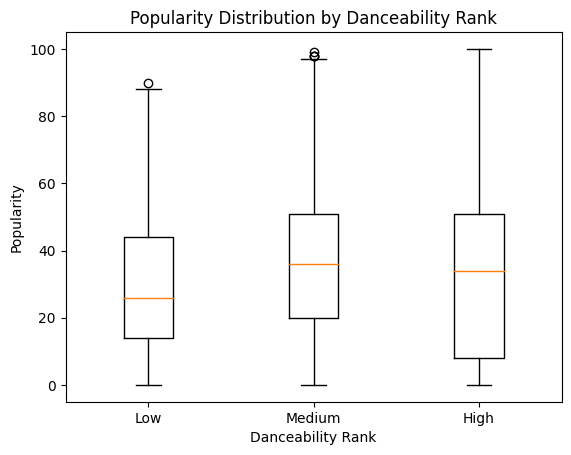

In [ ]:
plt.boxplot([df[df['danceability_rank'] == 'Low']['popularity'],
             df[df['danceability_rank'] == 'Medium']['popularity'],
             df[df['danceability_rank'] == 'High']['popularity']],
            labels = ['Low', 'Medium', 'High'])

plt.title("Popularity Distribution by Danceability Rank")
plt.xlabel("Danceability Rank")
plt.ylabel("Popularity")

plt.show()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = df.dropna(subset=['danceability_rank'])

tukey_results = pairwise_tukeyhsd(endog=df['popularity'], groups=df['danceability_rank'], alpha=0.05)

results_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
comparison_p_values = results_df[['group1', 'group2', 'meandiff', 'p-adj']]
print(comparison_p_values)

  group1  group2  meandiff  p-adj
0   High     Low   -3.6817    0.0
1   High  Medium    1.8852    0.0
2    Low  Medium    5.5669    0.0


Now, we will drop the danceability rank column as to not interfere with the rest of our data.

In [ ]:
df.drop('danceability_rank', axis = 1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Conclusion 2
Next, we will explore .  
**We will assume $\alpha = 0.05$.**  

Hypothesis 2:

HO: The energy of the track has no effect on the popularity of the track.

H1: The energy of the track has an effect on the popularity of the track.

**Hypothesis Testing:**

In [ ]:
minEnergy = min(df['energy'])
maxEnergy = max(df['energy'])

print(f"The minimum value in energy is {minEnergy} and the maximum value in energy is {maxEnergy}")

The minimum value in energy is 0.0 and the maximum value in energy is 1.0


Based on this range, we will add a column called `energy_rank` that ranks the energy of the track.

**Low Energy:** 0.00 - 0.35

**Medium Energy:** 0.36 - 0.70

**High Energy:** 0.71 - 0.99

In [ ]:
def energy_ranker(energy):
    if 0.00 <= energy <= 0.35:
        return 'Low'
    elif 0.36 <= energy <= 0.70:
        return 'Medium'
    elif 0.71 <= energy <= 0.99:
        return 'High'

df['energy_rank'] = df['energy'].apply(energy_ranker)
df

<ipython-input-47-cf21b22146af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_rank'] = df['energy'].apply(energy_ranker)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_rank,energy_rank
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium,Medium
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium,Low
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium,None
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low,Low
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low,Low
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low,Low
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium,Low
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium,Medium


Now, split the dataframe based on the energy ranking.

In [ ]:
groups = df.groupby(df['energy_rank'])

for (name, group) in groups:
  print(f"Ranking: {name} \n {group}")

Ranking: High 
         Unnamed: 0                track_id                   artists  \
14              14  4LbWtBkN82ZRhz9jqzgrb3  Chord Overstreet;Deepend   
51              51  3ILmwMefYZoQh5Cf5jeuUQ             Motohiro Hata   
55              55  6xJOhSm4SvZwzy3uhWz26O              Andrew Belle   
61              61  6nXIYClvJAfi6ujLiKqEq8              Andrew Belle   
86              86  6Uy6K3KdmUdAfelUp0SeXn            Sara Bareilles   
...            ...                     ...                       ...   
113979      113979  5wMkhfu3oYYmFimOGzeFt2       Fondo de la lectura   
113981      113981  1pBc7W7UQacUeQ6kBVlN9f             Planetshakers   
113987      113987  4jDhzTYkEG5GloIWwVeVkc             Planetshakers   
113988      113988  6PM55W7WiUmHVPdUebJP55             Planetshakers   
113992      113992  3FjOBB4EyIXHYUtSgrIdY9             Jesus Culture   

                                 album_name  \
14                          Hold On (Remix)   
51                       

We will also categorize the popularity into "Low", "Medium", and "High" categories.

In [ ]:
def popularity_ranker(popularity):
    if 0 <= popularity <= 30:
        return 'Low'
    elif 31 <= popularity <= 60:
        return 'Medium'
    elif 61 <= popularity <= 100:
        return 'High'

df['popularity_rank'] = df['popularity'].apply(popularity_ranker)
df

<ipython-input-49-845aa8f1a5eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity_rank'] = df['popularity'].apply(popularity_ranker)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_rank,energy_rank,popularity_rank
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium,Medium,High
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium,Low,Medium
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium,None,Medium
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low,Low,High
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low,Low,Low
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low,Low,Low
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium,Low,Low
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium,Medium,Medium


Now split it based on the energy and popularity. Following this, create a contingency table to summarize the counts of each combination of energy and popularity.

In [ ]:
df['energy_rank'] = df['energy'].apply(energy_ranker)
contingency_table = pd.crosstab(df['energy_rank'], df['popularity_rank'])
print(contingency_table)

popularity_rank  High    Low  Medium
energy_rank                         
High             5947  23655   20400
Low              1368   8810    6730
Medium           5571  16089   18791


<ipython-input-50-de724a424234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_rank'] = df['energy'].apply(energy_ranker)


Now, we conduct the test. We will use Chi-Square Test.



In [ ]:
from scipy.stats import chi2_contingency

chi2, pval_chi2, dof, expected = chi2_contingency(contingency_table)

pval_chi2

1.0612995561711994e-219

Based on the number above, the value is way below the significance level of 0.05. This indicates a significant relationship between the energy of a track and its popularity, leading us to reject the null hypothesis.

Now we will make a graph for Conclusion 2.

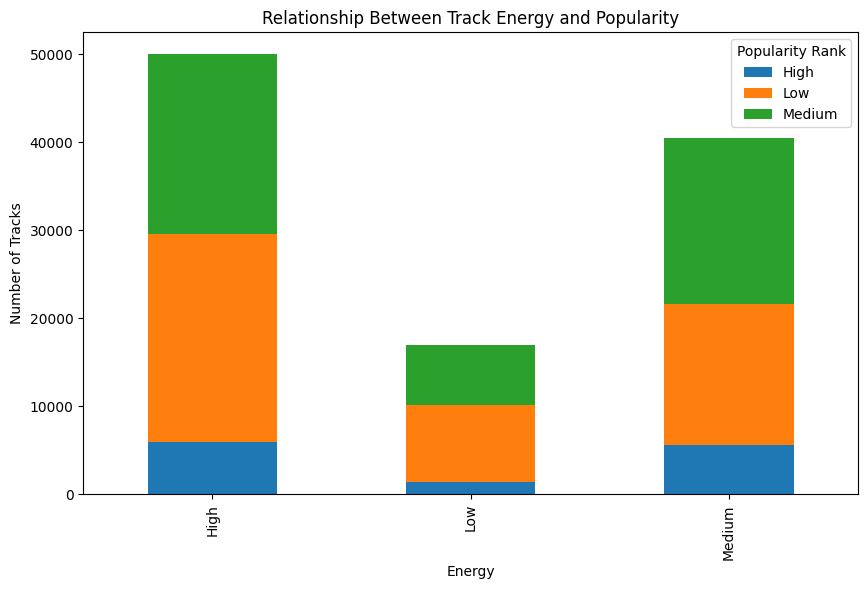

In [ ]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Relationship Between Track Energy and Popularity')
plt.xlabel('Energy')
plt.ylabel('Number of Tracks')
plt.legend(title='Popularity Rank')

plt.show()


Finally, we will drop the `popularity_rank` and `energy_rank` columns to avoid interference with the rest of our analysis.

In [ ]:
df.drop(['popularity_rank', 'energy_rank'], axis=1, inplace=True)

<ipython-input-53-196057b5a766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['popularity_rank', 'energy_rank'], axis=1, inplace=True)


### Conclusion 3
Finally, we will explore the relationship between the acousticness of the track and its popularity.  
**We will assume $\alpha = 0.05$.**

Hypothesis 3:

H0: The acousticness of a track has no effect on its popularity.

HA: The acousticness of a track has an effect on its popularity.

**Hypothesis Testing:**

In [ ]:
minAcoustic = min(df['acousticness'])
maxAcoustic = max(df['acousticness'])

print(f"The minimum value in acousticness is {minAcoustic} and the maximum value in acousticness is {maxAcoustic}")

The minimum value in acousticness is 0.0 and the maximum value in acousticness is 0.996


Based on this range, we will add a column called `acoustic_rank` that ranks the acousticness of the track.

**Low Acousticness:** 0.00 - 0.498

**High Acousticness:** 0.498 - 0.996

In [ ]:
def acoustic_ranker(acousticness):
    if 0.00 <= acousticness <= 0.498:
        return 'Low'
    elif 0.498 <= acousticness <= 0.996:
        return 'High'

df['acoustic_rank'] = df['acousticness'].apply(acoustic_ranker)
df

<ipython-input-71-083a44702536>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acoustic_rank'] = df['acousticness'].apply(acoustic_ranker)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_rank,acoustic_rank
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium,Low
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium,High
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium,Low
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low,High
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low,High
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low,High
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium,High
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium,Low


Now, we will split the dataframe based on the acoustic ranking.

In [ ]:
groups = df.groupby(df['acoustic_rank'])

for (name, group) in groups:
  print(f"Ranking: {name} \n {group}")

Ranking: High 
         Unnamed: 0                track_id  \
1                1  4qPNDBW1i3p13qLCt0Ki3A   
3                3  6lfxq3CG4xtTiEg7opyCyx   
6                6  6Vc5wAMmXdKIAM7WUoEb7N   
11              11  5ivF4eQBqJiVL5IAE9jRyl   
12              12  4ptDJbJl35d7gQfeNteBwp   
...            ...                     ...   
113994      113994  4WbOUe6T0sozC7z5ZJgiAA   
113995      113995  2C3TZjDRiAzdyViavDJ217   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX   
113999      113999  2hETkH7cOfqmz3LqZDHZf5   

                                     artists  \
1                               Ben Woodward   
3                               Kina Grannis   
6       A Great Big World;Christina Aguilera   
11                                Jason Mraz   
12                                  Dan Berk   
...                                      ...   
113994                        Lucas Cervetti   
113995                         Rainy Lullaby   

Now, we will conduct the test.

In [ ]:
from scipy import stats

low_acousticness = df[df['acousticness'] <= 0.498]['popularity']
high_acousticness = df[df['acousticness'] > 0.498]['popularity']

z_score_acousticness, pval_ztest_acousticness = ztest(low_acousticness, high_acousticness)

print(f"Z-Score: {z_score_acousticness}")
print(f"P-value: {pval_ztest_acousticness}")



Z-Score: 10.40607586819856
P-value: 2.3261346554203155e-25


#### Conclusion


Because the p-value is less than 0.05, we reject the null hypothesis. This means that the difference in popularity between tracks of different levels of acousticness is statistically significant. Therefore, acousticness does have a significant effect on the popularity of a track.

#### Graph for Conclusion 3

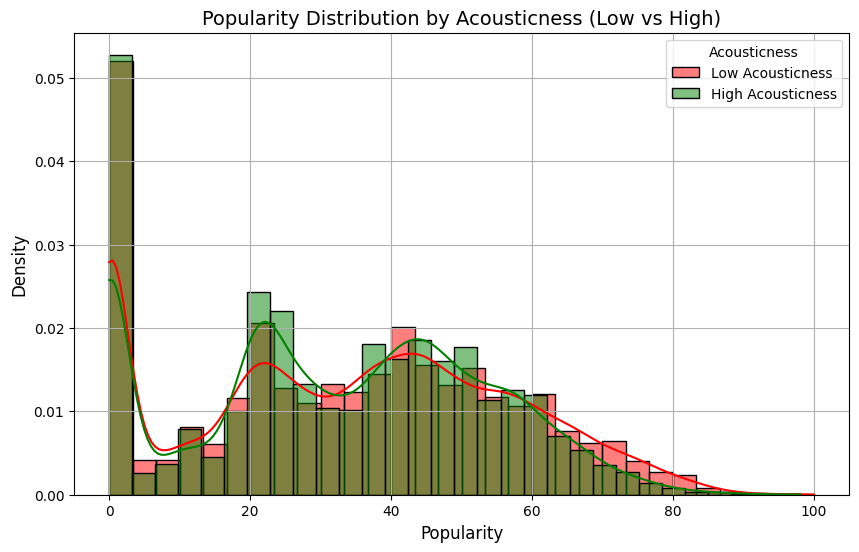

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(low_acousticness, kde=True, label="Low Acousticness", color='red', stat='density', bins=30)

sns.histplot(high_acousticness, kde=True, label="High Acousticness", color='green', stat='density', bins=30)

plt.title("Popularity Distribution by Acousticness (Low vs High)", fontsize=14)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Acousticness")
plt.grid(True)
plt.show()

Now, we will drop the acoustic rank column as to not interfere with the rest of our data.

In [ ]:
df.drop('acoustic_rank', axis = 1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_rank
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium
